In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.models import Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
x_train.shape  #N*D*T

(60000, 28, 28)

In [9]:
i= Input(x_train[0].shape)
x= LSTM(128)(i)
x= Dense(10, activation='softmax')(x)

model = Model(i,x)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs= 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 658us/sample - loss: 0.3281 - accuracy: 0.8953 - val_loss: 0.1128 - val_accuracy: 0.9643
Epoch 2/10
60000/60000 [==============================] - 38s 637us/sample - loss: 0.1047 - accuracy: 0.9682 - val_loss: 0.0846 - val_accuracy: 0.9748
Epoch 3/10
60000/60000 [==============================] - 38s 637us/sample - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 4/10
60000/60000 [==============================] - 38s 631us/sample - loss: 0.0568 - accuracy: 0.9832 - val_loss: 0.0779 - val_accuracy: 0.9739
Epoch 5/10
60000/60000 [==============================] - 38s 630us/sample - loss: 0.0462 - accuracy: 0.9863 - val_loss: 0.0612 - val_accuracy: 0.9811
Epoch 6/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0491 - val_accuracy: 0.9846
Epoch 7/10
60000/60000 [====================

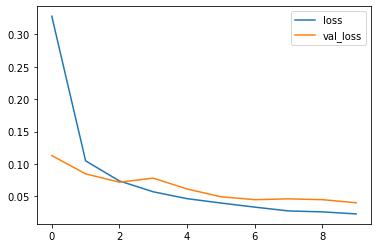

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

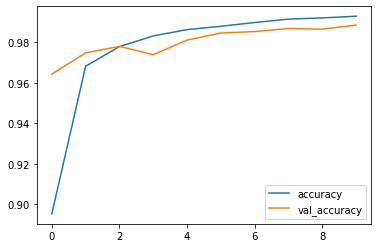

In [13]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [15]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [18]:
y_pred= model.predict(x_test)

In [19]:
y_pred1=np.argmax(y_pred,axis=1)

In [20]:
y_pred1

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:

y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
matrix= confusion_matrix(y_test,y_pred1)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f0c5ba9f98>)

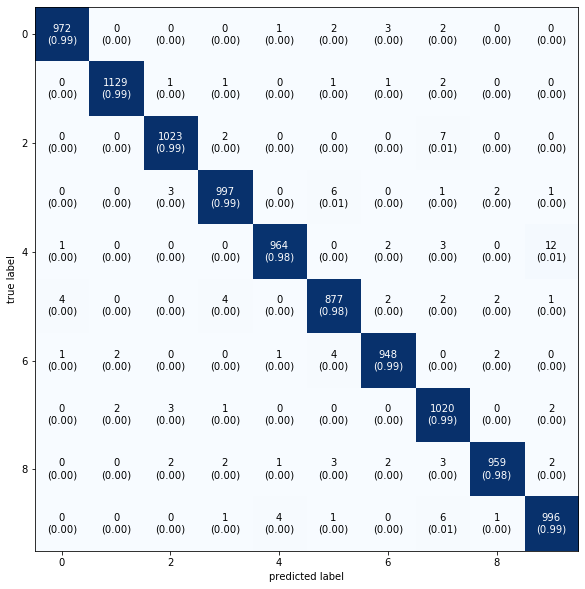

In [30]:
plot_confusion_matrix(conf_mat = matrix, figsize = (10,10), show_normed = True)

#show_normed= probability

C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


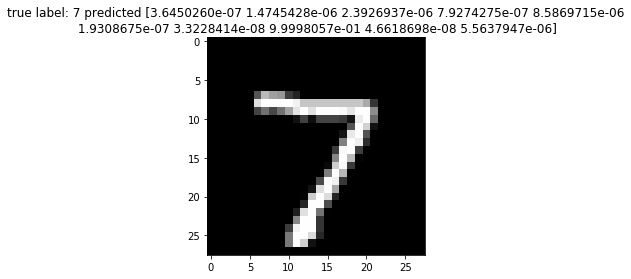

In [31]:
# show some misclassified examples
# numpy where function return the index of values

misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('true label: %s predicted %s' %(y_test[i], y_pred[i]));

#Python supports formatting values into strings. Although this can include very complicated expressions,
#the most basic usage is to insert values into a string with the %s placeholder.
#The %s token allows me to insert (and potentially format) a string. 
#Notice that the %s token is replaced by whatever I pass to the string after the % symbol